<a href="https://colab.research.google.com/github/YLiu95/Quantitative_Finance/blob/main/C%2B%2B_and_financial_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply C++ to Financial Engineering

>[Apply C++ to Financial Engineering](#scrollTo=2ZrSW7hp7Cij)

>[prepare C++ for colab](#scrollTo=xDHHwOuMfKg7)

>[key concepts of C++](#scrollTo=UEkqAT206EVe)

>>[class creation](#scrollTo=HxasgryvfSz6)

>>>[data encapsulation](#scrollTo=vmLYMs_EEo1l)

>>>[class inheritance](#scrollTo=U5NPsi31Qn4C)

>>>[polymorphism](#scrollTo=zWnJtfo7YnWn)

>>[operator overloading](#scrollTo=UKSWDpGqfQ5m)

>>[memory memagement](#scrollTo=8Yz9U9AElNj-)

>>[namespaces](#scrollTo=iYX2we3vlRrB)

>>[exception handling](#scrollTo=_3ZBYWkwlUgR)

>[C++ and financial engineering](#scrollTo=hZ-HSBooIia-)

>>[the binomial method](#scrollTo=Aumb3wCXomf4)

>>>[tree structure](#scrollTo=bU3TN3b0sNQ7)

>>[black scholes model](#scrollTo=bTDrxNa2CUiq)

>[end of document](#scrollTo=a1sVHYnOIe75)



# prepare C++ for colab

In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-b2xb77j0
  Running command git clone -q https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-b2xb77j0


In [ ]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


In [ ]:
%%cu
#include <iostream>
    int
    main()
{
    std::cout << "Welcome To GeeksforGeeks\n";
    return 0;
}

Welcome To GeeksforGeeks



In [ ]:
%%cu
#include <iostream>
#include <chrono>
#include <cmath>

int main() {
  long long n = std::pow(10, 5);  // Set the value of n
  long long sum = 0;  // Initialize the sum to 0
  auto start = std::chrono::high_resolution_clock::now();  // Start the timer
  for (int i = 1; i <= n; i++) {
    sum += i;  // Add i to the sum
  }
  auto end = std::chrono::high_resolution_clock::now();  // Stop the timer
  std::chrono::duration<double> elapsed = end - start;  // Calculate the elapsed time
  std::cout << "Sum of first " << n << " natural numbers: " << sum << std::endl;
  std::cout << "Elapsed time: " << elapsed.count() << " seconds" << std::endl;
  return 0;
}


Sum of first 100000 natural numbers: 5000050000
Elapsed time: 0.000332448 seconds



In [ ]:
!apt-get update
!apt-get install libgraphviz-dev

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (76.4 kB/s)
Reading package li

# key concepts of C++

## class creation

### data encapsulation

**what is data encapsulation?**


data encapsulation is a programming technique that involves enclosing data within a class and controlling access to it through member functions. This can help to protect the data from accidental or malicious modification, and can make it easier to manage and maintain the code.

implement data encapsulation in C++:



In [ ]:
%%time
%%cu
#include <iostream>

class Point {
private:
  int x;
  int y;

public:
  void set_x(int value) {
    x = value;
  }

  void set_y(int value) {
    y = value;
  }

  int get_x() const {
    return x;
  }

  int get_y() const {
    return y;
  }
};

int main() {
  Point p;
  p.set_x(10);
  p.set_y(20);
  std::cout << "x: " << p.get_x() << ", y: " << p.get_y() << std::endl;
  return 0;
}


x: 10, y: 20

CPU times: user 12.4 ms, sys: 12.9 ms, total: 25.3 ms
Wall time: 1.48 s


In this implementation, the `Point` class has two private attributes called `x` and `y`, which represent the coordinates of a point in two-dimensional space. The class also has four member functions: `set_x` and `set_y`, which allow the caller to set the values of `x` and `y`, and `get_x` and `get_y`, which allow the caller to retrieve the values of `x` and `y`.

The private attributes are only accessible within the class, so the only way to read or modify their values is through the member functions. This means that the data is "encapsulated" within the class, and can only be accessed through the interface provided by the member functions.

implement data encapsulation in Python:

In [ ]:
%%time
class Point:
    def __init__(self, x, y):
        self.__x = x
        self.__y = y

    def set_x(self, value):
        self.__x = value

    def set_y(self, value):
        self.__y = value

    def get_x(self):
        return self.__x

    def get_y(self):
        return self.__y

p = Point(10, 20)
print(f"x: {p.get_x()}, y: {p.get_y()}")


x: 10, y: 20
CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.61 ms


In this python implementation, the `Point` class has two private attributes called `_x` and `_y`, which represent the coordinates of a point in two-dimensional space. The class also has four member functions: `set_x` and `set_y`, which allow the caller to set the values of `_x` and `_y`, and `get_x` and `get_y`, which allow the caller to retrieve the values of `_x` and `_y`.

The private attributes are only accessible within the class, so the only way to read or modify their values is through the member functions. This means that the data is "encapsulated" within the class, and can only be accessed through the interface provided by the member functions.

In both C++ and Python, data encapsulation allows you to control access to the data within a class, which can help to protect it from accidental or malicious modification and make the code easier to manage.

### class inheritance

**what is class inheritance?**

class inheritance is a programming technique that allows you to create a new class that is derived from an existing class, inheriting its attributes and behaviors. This allows you to reuse and extend code from the base class in the derived class.

implement class inheritance in C++:

In [ ]:
%%time
%%cu
#include <iostream>

class Shape {
protected:
  int sides;

public:
  Shape(int sides) : sides(sides) {}

  virtual int get_area() const = 0;
  int get_sides() const { return sides; }
};

class Rectangle : public Shape {
private:
  int width;
  int height;

public:
  Rectangle(int width, int height) : Shape(4), width(width), height(height) {}

  int get_area() const override {
    return width * height;
  }
};

class Triangle : public Shape {
private:
  int base;
  int height;

public:
  Triangle(int base, int height) : Shape(3), base(base), height(height) {}

  int get_area() const override {
    return base * height / 2;
  }
};

int main() {
  Shape *shapes[] = { new Rectangle(10, 20), new Triangle(10, 20) };
  for (const auto &shape : shapes) {
    std::cout << "area: " << shape->get_area() << ", sides: " << shape->get_sides() << std::endl;
  }
  return 0;
}


area: 200, sides: 4
area: 100, sides: 3

CPU times: user 15.3 ms, sys: 11.1 ms, total: 26.4 ms
Wall time: 1.46 s


In this implementation, the `Shape` class represents a geometric shape with a certain number of sides. The class has a protected attribute called `sides` that stores the number of sides, and two member functions: `get_area`, which returns the area of the shape, and `get_sides`, which returns the number of sides. The `get_area` function is marked as virtual, which means that it can be overridden by derived classes.

The `Rectangle` and `Triangle` classes are derived from the `Shape` class, and they override the `get_area` function to provide their own implementation based on the width and height of the rectangle or the base and height of the triangle. They also inherit the `get_sides` function from the `Shape` class, which allows them to return the correct number of sides for their respective shapes.

### polymorphism

**what is polymorphism?**


In C++, you can use inheritance and other techniques to achieve polymorphism, which allows you to write code that can be used with multiple types of objects in a flexible way. This can be useful in quantitative finance when you need to create classes that represent different financial instruments or models, and you want to be able to use them in a consistent way.

implement polymorphism in C++:

In [ ]:
%%cu
#include <iostream>

// Base class
class Shape {
 public:
  virtual double area() const = 0;
  virtual double perimeter() const = 0;
};

// Derived class
class Rectangle : public Shape {
 private:
  double width_;
  double height_;
 public:
  Rectangle(double width, double height) : width_(width), height_(height) {}
  double area() const override { return width_ * height_; }
  double perimeter() const override { return 2 * (width_ + height_); }
};

// Another derived class
class Circle : public Shape {
 private:
  double radius_;
 public:
  Circle(double radius) : radius_(radius) {}
  double area() const override { return 3.14 * radius_ * radius_; }
  double perimeter() const override { return 2 * 3.14 * radius_; }
};

int main() {
  Shape *s1 = new Rectangle(10, 5);
  Shape *s2 = new Circle(2);

  std::cout << "Rectangle area: " << s1->area() << std::endl;
  std::cout << "Circle area: " << s2->area() << std::endl;

  delete s1;
  delete s2;
  return 0;
}


Rectangle area: 50
Circle area: 12.56



In this implementation, the `Shape` class is the base class and the `Rectangle` and `Circle` classes are derived classes. The `Shape` class has two pure virtual functions, `area` and `perimeter`, which are implemented in the derived classes.

The `Rectangle` class has two private member variables, `width_` and `height_`, and the `Circle` class has one private member variable, `radius_`. Both derived classes override the `area` and `perimeter` functions to provide their own implementations.

In the main function, we create a `Rectangle` object and a `Circle` object and store their addresses in pointers of type `Shape`. Since `Rectangle` and `Circle` are both derived from `Shape`, we can store their addresses in `Shape` pointers.

We then call the `area` function on both objects using the `Shape` pointers. Since the `area` function is virtual in the base class, the correct implementation of the function (either the one in `Rectangle` or the one in `Circle`) is called at runtime depending on the type of the object. This is an example of polymorphism, where a single function call can behave differently depending on the type of the object it is called on.





## operator overloading

**what is operator overloading?**


Operator overloading is a feature in C++ that allows you to redefine the meaning of operators such as `+, -, *, /, %, =, ==, !=, <, >, <=, >=` when used with user-defined data types such as classes and structures.

When you overload an operator, you provide a new implementation for the operator that is specific to your class or structure. This means that when the overloaded operator is used with an object of your class or structure, it behaves differently than the original operator would.

For example, you can overload the `+` operator to concatenate two strings, or to add two numbers together, or to perform any other operation that makes sense for your class or structure.

Operator overloading in C++ is achieved by defining a function that has the same name as the operator, but with the keyword `operator` in front of it. The function takes one or more parameters, and it can be a member function of the class or a standalone function.

In [ ]:
%%cu
#include <iostream>
#include <cmath>

class Price {
 private:
  double value_;  // The value of the price.

 public:
  // Constructor that initializes the value.
  Price(double value) : value_(value) {}

  // Getter function that returns the value.
  double GetValue() const { return value_; }

  // Overloaded + operator that performs a time-weighted average of two prices.
  Price operator+(const Price& other) const {
    return Price((value_ + other.value_) / 2);
  }

  // Overloaded * operator that multiplies a price by a quantity.
  double operator*(double quantity) const {
    return value_ * quantity;
  }
};

int main() {
  // Create two prices.
  Price p1(100);
  Price p2(200);

  // Perform a time-weighted average of the prices.
  Price p3 = p1 + p2;
  std::cout << "Average price: " << p3.GetValue() << std::endl;

  // Multiply a price by a quantity.
  double trade_value = p3 * 50;
  std::cout << "Trade value: " << trade_value << std::endl;

  return 0;
}


Average price: 150
Trade value: 7500




This C++ code implement operator overloading by defining the `Price` class and overloading the `+` and `*` operators for this class.

The `Price` class has a private data member called `value_` that represents the value of a price. It has a constructor that takes a `double` value and initializes the `value_` member. It also has a public getter function called `GetValue()` that returns the value of a `Price` object.

The `Price` class then overloads the `+` operator using the `operator+` function. The `operator+` function takes a reference to another `Price` object and returns a new `Price` object that represents the time-weighted average of the two prices. This is achieved by adding the values of the two prices and dividing by 2, and then creating a new `Price` object with this value.

The Price class also overloads the `*` operator using the `operator*` function. The `operator*` function takes a `double` quantity and returns the product of the value of the `Price` object and the quantity.

In the `main` function, two `Price` objects are created, and their time-weighted average is calculated using the overloaded `+` operator. The resulting Price object is then printed using `GetValue()`.

The `*` operator is then used to multiply the time-weighted average `Price` object by a quantity, and the resulting value is printed.

By overloading the `+` and `*` operators for the `Price` class, the code allows for more intuitive and natural use of these operators with `Price` objects.

## memory memagement

**what is memory leak?**


example of memory leak:
>look at the RAM bar when running the code

In [ ]:
%%cu
#include <iostream>
#include <string>

using namespace std;

int main() {
  while (true) {
    // Allocate memory for a new string
    string* s = new string("Hello, World!");
    // We forgot to delete the string, so the memory is never freed
  }
  return 0;
}


In this example, the program continually allocates memory for a new string, but it never frees the memory by calling delete. This results in a memory leak, as the program continually consumes more and more memory without ever releasing it.

To fix this memory leak, we would need to add a delete statement to free the memory when it is no longer needed:
> it runs forever

In [ ]:
%%cu
#include <iostream>
#include <string>

using namespace std;

int main() {
  while (true) {
    // Allocate memory for a new string
    string* s = new string("Hello, World!");
    // Do something with the string
    cout << *s << endl;
    // Free the memory when we're done with the string
    delete s;
  }
  return 0;
}


** what is segmentation fault?**
 
 example of segmentation fault:

In this example, the program attempts to access the element at index 0 of an uninitialized pointer array. This results in a segmentation fault, as the program is trying to access memory that it is not allowed to access.



In [ ]:
%%cu
#include <iostream>

int main() {
  int* array = NULL;
  // Attempt to access an element of the array
  std::cout << array[0] << std::endl;
  return 0;
}


Another common cause of segmentation faults is dereferencing a null pointer:



In [ ]:
%%cu
#include <iostream>

int main() {
  int* ptr = NULL;
  // Attempt to dereference the null pointer
  *ptr = 42;
  return 0;
}


In this example, the program attempts to dereference the null pointer ptr, which also results in a segmentation fault.

To avoid segmentation faults, you should ensure that pointers are initialized to valid memory locations before dereferencing them and that you do not try to access memory that you are not allowed to access.

implement memory management:

In [ ]:
%%cu
#include <iostream>

int main() {
  // Allocate memory for an array of 100 integers
  int* data = new int[100];

  // Initialize the array with some values
  for (int i = 0; i < 100; i++) {
    data[i] = i;
  }

  // Do some calculations with the data
  double sum = 0;
  for (int i = 0; i < 100; i++) {
    sum += data[i];
  }
  std::cout << "Sum: " << sum << std::endl;

  // Deallocate the memory
  delete[] data;

  return 0;
}


Sum: 4950



In this implementation, we use the new operator to dynamically allocate memory for an array of 100 integers. We then initialize the array with some values and perform some calculations with the data. After we are done with the data, we use the `delete[]` operator to deallocate the memory that was previously allocated with new.

Proper memory management is important in this implementation because we are responsible for allocating and deallocating the memory ourselves. If we fail to deallocate the memory after we are finished with it, we could potentially run into issues such as memory leaks or segmentation faults. By using new and delete appropriately, we can ensure that our application uses memory efficiently and runs smoothly.

## namespaces

**what is a namespace?**

In C++, a namespace is a container that holds a set of identifiers (e.g. functions, variables, classes, etc.). Namespaces are used to organize and group related identifiers and to avoid naming conflicts between different identifiers that may have the same name.

Namespaces are important in quantitative finance applications because they can help to avoid naming conflicts and improve the organization and readability of the code. In quantitative finance applications, it is common to use many different libraries and frameworks that may define their own identifiers. By using namespaces, it is possible to clearly differentiate between the identifiers defined by different libraries and frameworks, and to avoid any conflicts that may arise from having multiple identifiers with the same name.

implement namespaces in C++:

In [ ]:
%%cu
#include <iostream>

// Define a namespace "math"
namespace math {
  double pi = 3.14159;

  double add(double a, double b) {
    return a + b;
  }
}

int main() {
  // Use the identifiers from the "math" namespace
  std::cout << "pi = " << math::pi << std::endl;
  std::cout << "2 + 3 = " << math::add(2, 3) << std::endl;

  return 0;
}


pi = 3.14159
2 + 3 = 5



In this example, we define a namespace "math" that contains the identifier `pi` and the function add. We can access these identifiers by using the namespace name as a prefix (e.g. `math::pi`). This allows us to clearly differentiate between these identifiers and any other identifiers that may have the same name.

Overall, namespaces are an important tool in C++ for organizing and avoiding naming conflicts in quantitative finance applications, and they can help to improve the readability and maintainability of the code.

## exception handling

**what is exception handling?**

Exception handling is a mechanism in C++ (and other programming languages) that allows a program to handle runtime errors or exceptional conditions in a structured and predictable way. Exception handling is important to quantitative finance applications because it can help to improve the reliability and robustness of the software.

In C++, exception handling is implemented using the try and catch statements. The try block encloses a block of code that may throw an exception, and the catch block handles the exception if it is thrown.

implement exception handling:

In [ ]:
%%cu
#include <iostream>
#include <stdexcept>

int main() {
  try {
    // Code that may throw an exception
    int a = 5;
    int b = 0;
    if (b == 0) {
      throw std::runtime_error("Division by zero");
    }
    int c = a / b;
    std::cout << "c = " << c << std::endl;
  } catch (const std::runtime_error& e) {
    // Exception handling code
    std::cerr << "Error: " << e.what() << std::endl;
  }

  return 0;
}


Error: Division by zero



In this implementation, we use a `try` block to enclose a block of code that may throw a `std::runtime_error` exception if the division by zero is attempted. If the exception is thrown, it is caught by the `catch` block, which prints an error message to the standard error stream.

Exception handling is important in quantitative finance applications because it allows the program to handle exceptional conditions in a controlled and predictable way, rather than crashing or producing undefined results. This can help to improve the reliability and robustness of the software, and to ensure that it continues to function correctly even in the presence of errors or exceptional conditions.

# C++ and financial engineering

## the binomial method 

To design and implement a set of C++ classes for pricing options using the binomial method, we follow the following steps:

1. Understand the principles of the binomial method for pricing options. This involves understanding how to model the underlying asset's price movement using a tree structure, and how to use the tree to calculate the option's value at different points in time.

2. Determine the data structures and algorithms you will need to implement the binomial method in C++. This may involve deciding on a suitable representation for the tree structure, as well as defining the functions and methods that will be used to build, traverse, and manipulate the tree.

3. Design the C++ classes that will make up your option pricing system. This may involve deciding on the responsibilities of each class, as well as the relationships between them. You may find it helpful to use UML diagrams or other visual tools to document your design.

4. Implement the classes according to your design. This will involve writing the code for each class's methods and functions, as well as any supporting functions or data structures you may need.

5. Test your implementation to ensure it is correct and performs well. This may involve writing unit tests for each class and function, as well as testing the system as a whole using a range of test cases.

6. Document your code and make it easy to maintain and understand. This may involve adding comments to explain the purpose and operation of each class and function, as well as organizing the code in a logical and consistent way.

C++ implementation:

In [ ]:
%%cu
#include <iostream>
#include <vector>

// Define a class to represent a node in the tree
class Node {
public:
  // Constructor
  Node(double price, double time, double interest) : price(price), time(time), interest(interest) {}

  // Member variables to hold the price, time, and interest rate
  double price;
  double time;
  double interest;

  // Pointers to the node's children
  std::vector<Node*> children;

  // Option price at this node
  double optionPrice;
};

// Build the tree using the binomial model
void buildTree(Node* root, int numPeriods, double sigma, double u, double d) {
  // Base case: if the root node is a leaf, return
  if (root->time == numPeriods) {
    return;
  }

  // Otherwise, create the children nodes
  double priceU = root->price * u;
  double priceD = root->price * d;
  double time = root->time + 1;
  double interest = root->interest;

  root->children.push_back(new Node(priceU, time, interest));
  root->children.push_back(new Node(priceD, time, interest));

  // Recurse on the children nodes
  buildTree(root->children[0], numPeriods, sigma, u, d);
  buildTree(root->children[1], numPeriods, sigma, u, d);
}

// Calculate the option price using the backward induction step
double priceOption(Node* root, double strike, double p) {
  // Base case: if the root node is a leaf, return the option's payoff
  if (root->time == 0) {
    return root->price > strike ? root->price - strike : 0;
  }

  // Otherwise, calculate the option price at the children nodes
  root->children[0]->optionPrice = priceOption(root->children[0], strike, p);
  root->children[1]->optionPrice = priceOption(root->children[1], strike, p);

  // Use the option prices at the children nodes to calculate the option price at the root node
  double disc = 1 / (1 + root->interest);
  root->optionPrice = (p * root->children[0]->optionPrice + (1 - p) * root->children[1]->optionPrice) * disc;

  return root->optionPrice;
}

int main() {
  // Build a tree for an asset with initial price 100, 5 time periods, and interest rate 0.1
  Node* root = new Node(100, 0, 0.1);
  buildTree(root, 5, 0.2, 1.1, 0.9);

  // Calculate the price of a call option with strike price 95
  double optionPrice = priceOption(root, 95, 0.5);
  std::cout << "Option price: " << optionPrice << std::endl;

  return 0;
}


Option price: 5



The `Node` class represents a node in the tree, and has member variables to hold the asset's price, time period, and risk-free interest rate at that point in time. It also has pointers to the node's children and a member variable `optionPrice` to hold the option's price at that node.

The `buildTree` function builds the tree using the binomial model. It takes as input the root node, the number of time periods, and the volatility and up/down factors for the asset. It creates children nodes for the root node using the up and down factors, and then recursively builds the tree using these children as the root nodes.

The `priceOption` function calculates the option price using the backward induction step. It takes as input the root node, the strike price of the option, and the probability of the asset's price going up. It first calculates the option prices at the children nodes by recursively calling itself on the children nodes. Then it uses the option prices at the children nodes to calculate the option price at the root node using the formula:

```
optionPrice = (p * optionPrice[up] + (1 - p) * optionPrice[down]) / (1 + interest)
```

where `p` is the probability of the asset's price going up, `interest` is the risk-free interest rate, and `optionPrice[up]` and `optionPrice[down]` are the option prices at the children nodes corresponding to the asset's price going up or down. The function returns the option price at the root node.

Finally, in the main function, we build the tree using the `buildTree` function and then use the `priceOptio` function to calculate the option price. The option price is then printed to the console.

### tree structure
model asset price movement using tree structure in Python:

In [ ]:
class AssetNode:
    def __init__(self, price, prob):
        self.price = price
        self.prob = prob
        self.children = []
    
    def add_child(self, node):
        self.children.append(node)

def build_tree(depth, node):
    if depth == 0:
        return
    
    # Calculate the price and probability for the up and down nodes
    up_price = node.price * 1.1
    up_prob = node.prob * 0.8
    down_price = node.price * 0.9
    down_prob = node.prob * 0.2
    
    # Create up and down nodes
    up_node = AssetNode(up_price, up_prob)
    down_node = AssetNode(down_price, down_prob)
    
    # Add the up and down nodes as children of the current node
    node.add_child(up_node)
    node.add_child(down_node)
    
    # Recursively build the tree for the up and down nodes
    build_tree(depth-1, up_node)
    build_tree(depth-1, down_node)

# Create the root node with an initial price of 100 and probability of 1.0
root_node = AssetNode(100, 1.0)

# Build the tree with a depth of 3
build_tree(3, root_node)

# You can now traverse the tree to calculate the expected price of the asset at each node


visualise the tree structure

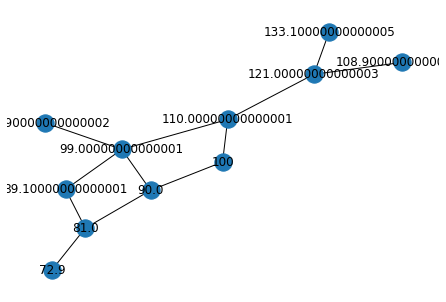

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Recursively add nodes and edges to the graph
def add_to_graph(node):
    G.add_node(node.price)
    for child in node.children:
        G.add_edge(node.price, child.price)
        add_to_graph(child)

add_to_graph(root_node)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()


The output chart shows the tree structure that represents the price movement of the asset. Each node in the tree represents a possible price for the asset at a given point in time. The edges between the nodes represent the transitions between the different prices.

The root node represents the initial price of the asset. The children of the root node represent the possible prices that the asset can take on at the next time step, based on the probabilities specified in the AssetNode class. The children of these nodes represent the possible prices at the next time step, and so on.

For example, if the initial price of the asset is 100, and the probabilities of the asset going up or down are 0.8 and 0.2, respectively, then the up and down children of the root node will represent the prices 110 and 90, respectively, at the next time step. The children of these nodes will represent the prices at the following time step, and so on.

The graph visualizes the tree structure and allows you to see the different possible paths that the asset price can take over time.

Option value: 4.41


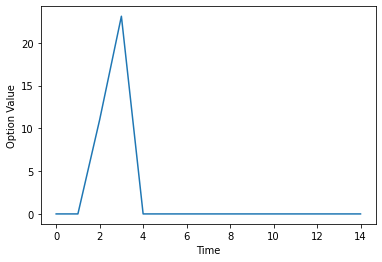

In [ ]:
def calculate_option_value(node, option_type, strike_price, time_to_expiry, discount_factor, values):
    # Calculate the option value at the current node
    if option_type == "call":
        option_value = max(node.price - strike_price, 0)
    elif option_type == "put":
        option_value = max(strike_price - node.price, 0)
    
    # Add the option value to the list
    values.append(option_value)
    
    # If the current node is a leaf node (i.e., no children), return the option value
    if len(node.children) == 0:
        return option_value
    
    # Otherwise, calculate the expected option value at the next time step
    expected_option_value = 0
    for child in node.children:
        expected_option_value += calculate_option_value(child, option_type, strike_price, time_to_expiry, discount_factor, values) * child.prob
    
    # Return the discounted expected option value
    return discount_factor * expected_option_value

# Initialize an empty list to store the option values
values = []

# Calculate the option value at the root node
option_value = calculate_option_value(root_node, "call", 110, 1, 0.9, values)

print(f"Option value: {option_value:.2f}")


# Plot the option values over time
plt.plot(values)
plt.xlabel("Time")
plt.ylabel("Option Value")
plt.show()


## black scholes model

In [ ]:
%%cu
#include <iostream>
#include <cmath>
#include <boost/math/distributions/normal.hpp>


// Black-Scholes formula for pricing European call options
double blackScholes(double S, double K, double r, double sigma, double T) {
  double d1 = (log(S / K) + (r + sigma * sigma / 2) * T) / (sigma * sqrt(T));
  double d2 = d1 - sigma * sqrt(T);
  boost::math::normal_distribution<double> normal;
  return S * boost::math::cdf(normal, d1) - K * exp(-r * T) * boost::math::cdf(normal, d2);
}

int main() {
  double S = 100;   // underlying asset price
  double K = 105;   // strike price
  double r = 0.05;  // risk-free interest rate
  double sigma = 0.2; // volatility
  double T = 1;     // time to expiration (in years)

  double callPrice = blackScholes(S, K, r, sigma, T);
  std::cout << "Call price: " << callPrice << std::endl;

  return 0;
}


Call price: 8.02135



# end of document